In [2]:
import zipfile
import os

In [3]:
uploaded_zip_path = r"C:\Users\Sreeja Mondal\Downloads\archive (17).zip"
extracted_file = "Plant_Disease_Prediction"

if not os.path.exists(extracted_file):
    os.makedirs(extracted_file)

with zipfile.ZipFile(uploaded_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_file)

print(f'Files extracted to {extracted_file}')

extracted_files = os.listdir(extracted_file)
print(f'Number of files extracted: {len(extracted_files)}')
print(f'First 10 files: {extracted_files[:10]}')


Files extracted to Plant_Disease_Prediction
Number of files extracted: 1
First 10 files: ['plantvillage dataset']


In [4]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)

In [5]:
import os 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models 

Found 54305 files belonging to 38 classes.


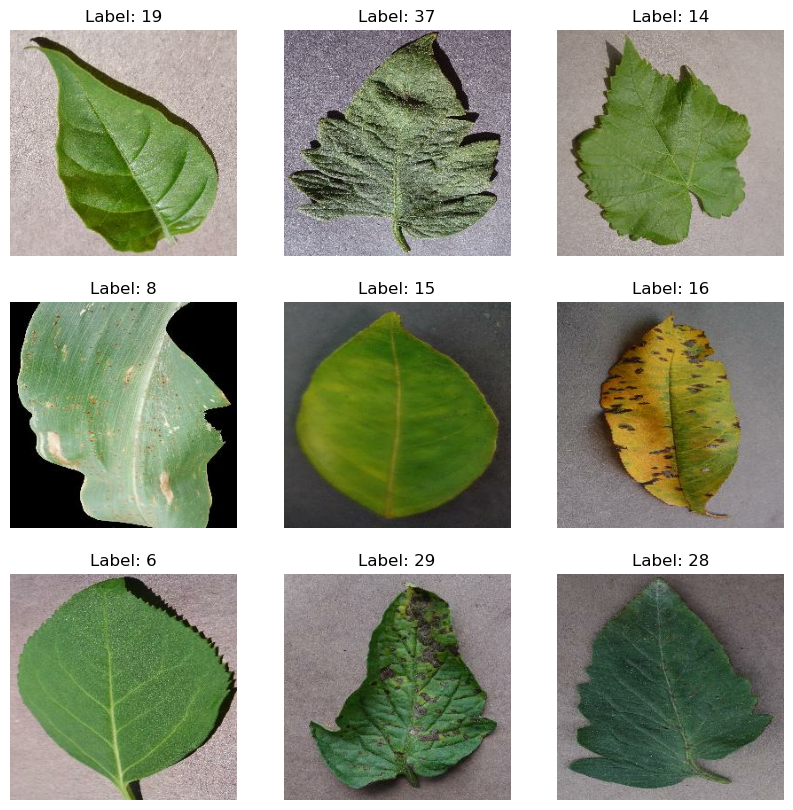

Image batch shape: (32, 256, 256, 3)
Label batch shape: (32,)
Labels: [ 8 28 24 14  4 26 35 10 30 32 18 15 10  6  1 15 10  4 12 33 33 15 15 12
  1 24  8 16 19 11 29 34]


In [6]:
import matplotlib.pyplot as plt

# Directory paths
train_dir = 'Plant_Disease_Prediction/plantvillage dataset/color' 
#valid_dir = 'cats_dogs_dataset/dogscats/valid'  

# Create image data generators
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory=train_dir,
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

#test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    #directory=valid_dir,
    #label_mode='int',
    #batch_size=32,
    #image_size=(256, 256)
#)

# Normalize the data
normalization_layer = tf.keras.layers.Rescaling(1./255)

# Apply normalization to the datasets
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
#test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))

# Function to display a batch of images with their labels
def display_batch_of_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy())
            plt.title(f'Label: {int(labels[i])}')
            plt.axis("off")
    plt.show()

# Display images from the training dataset
display_batch_of_images(train_ds)

# Function to print dataset information
def print_dataset_info(dataset):
    for images, labels in dataset.take(1):
        print(f'Image batch shape: {images.shape}')
        print(f'Label batch shape: {labels.shape}')
        print(f'Labels: {labels.numpy()}')

# Print training dataset information
print_dataset_info(train_ds)


In [7]:
img_size = 224
batch_size = 32

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
    rescale=1/255,  
    validation_split=0.2
)


In [9]:
train_generator = data_gen.flow_from_directory(
    train_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [10]:
validation_generator = data_gen.flow_from_directory(
    train_dir,
    target_size=(img_size,img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [11]:
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 256)               4

In [13]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=3,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples//batch_size
)

Epoch 1/3
 644/1358 [=============>................] - ETA: 43:45 - loss: 1.4042 - accuracy: 0.6413